<a href="https://colab.research.google.com/github/simplifique-treinamentos/curso-intro-python/blob/main/Viz1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Importo as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

## 1.1) Carrego o dataset

In [ ]:
caminho = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

In [ ]:
df_diabetes = pd.read_csv(caminho, header=None, sep="," , decimal=".")
df_diabetes.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_diabetes.shape

(768, 9)

## 1.2) Renomeio as colunas

In [ ]:
df_diabetes.columns = ['num_gravidez','glicose','pressao_dias','espessura_pele',
                        'teste_insulina', 'imc', 'diabetes_pedigree_function',
                        'idade', 'diabetes'
                      ]
df_diabetes.head()

,num_gravidez,glicose,pressao_dias,espessura_pele,teste_insulina,imc,diabetes_pedigree_function,idade,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##1.3) Recategorizo a variável num_gravidez

In [ ]:
df_diabetes['gravidez_categorica'] = pd.cut(x=df_diabetes['num_gravidez'],
                                              bins=[0, 2, 5, 100],
                                              labels=['0 a 2', '3 a 5', 'mais de 5'],
                                              include_lowest= True
                                            )

##1.4) Verifico tamanho e estatísticas do dataset

In [ ]:
df_diabetes.describe()

,num_gravidez,glicose,pressao_dias,espessura_pele,teste_insulina,imc,diabetes_pedigree_function,idade,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   num_gravidez                768 non-null    int64   
 1   glicose                     768 non-null    int64   
 2   pressao_dias                768 non-null    int64   
 3   espessura_pele              768 non-null    int64   
 4   teste_insulina              768 non-null    int64   
 5   imc                         768 non-null    float64 
 6   diabetes_pedigree_function  768 non-null    float64 
 7   idade                       768 non-null    int64   
 8   diabetes                    768 non-null    int64   
 9   gravidez_categorica         768 non-null    category
dtypes: category(1), float64(2), int64(7)
memory usage: 55.0 KB


# 2) Gráficos e análise de relacionamentos

## 2.1) Gráfico de Barras

In [ ]:
df_diabetes['gravidez_categorica'].value_counts()

0 a 2        349
mais de 5    219
3 a 5        200
Name: gravidez_categorica, dtype: int64

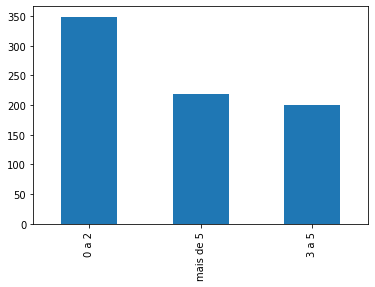

In [ ]:
df_diabetes['gravidez_categorica'].value_counts().plot.bar()

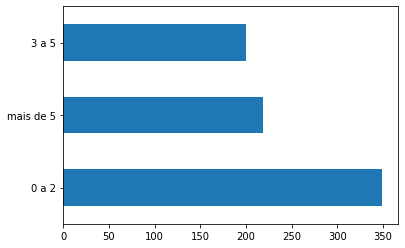

In [ ]:
df_diabetes['gravidez_categorica'].value_counts().plot.barh()

## 2.2) Gráfico de Linhas

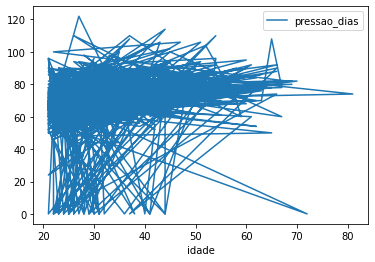

In [ ]:
df_diabetes.plot(x='idade', y='pressao_dias', kind='line')

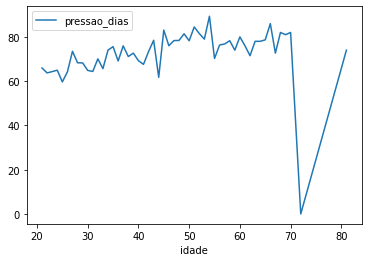

In [ ]:
df_diabetes[['idade','pressao_dias']].groupby('idade').mean().plot.line()

## 2.3) Gráfico de Setores

In [ ]:
df_diabetes['gravidez_categorica'].value_counts()

0 a 2        349
mais de 5    219
3 a 5        200
Name: gravidez_categorica, dtype: int64

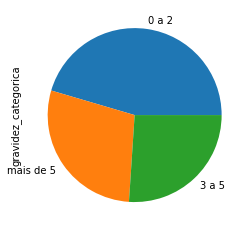

In [ ]:
df_diabetes['gravidez_categorica'].value_counts().plot.pie()

In [ ]:
rotulos = ['0 a 2', 'mais de 5', '3 a 5']

In [ ]:
df_diabetes['gravidez_categorica'].value_counts()[0]

349

In [ ]:
df_diabetes['gravidez_categorica'].value_counts()[1]

219

In [ ]:
df_diabetes['gravidez_categorica'].value_counts()[2]

200

In [ ]:
tamanho_fatias = [df_diabetes['gravidez_categorica'].value_counts()[0],
                  df_diabetes['gravidez_categorica'].value_counts()[1],
                  df_diabetes['gravidez_categorica'].value_counts()[2]
                  ]

In [ ]:
destaque = [0.1,0.1,0.1]

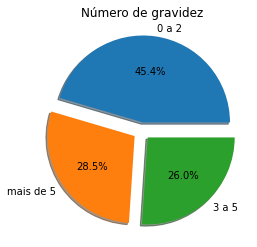

In [ ]:
df_diabetes['gravidez_categorica'].value_counts() \
            .plot.pie(x=tamanho_fatias,
                      labels=rotulos,
                      label = '',
                      title = 'Número de gravidez',
                      autopct = '%1.1f%%',
                      shadow = True,
                      explode = destaque
                      );

## 2.4) Histogramas

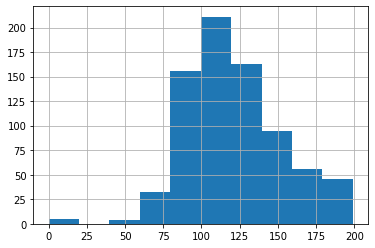

In [ ]:
df_diabetes.glicose.hist()

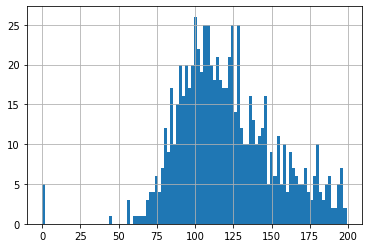

In [ ]:
df_diabetes.glicose.hist(bins=100)

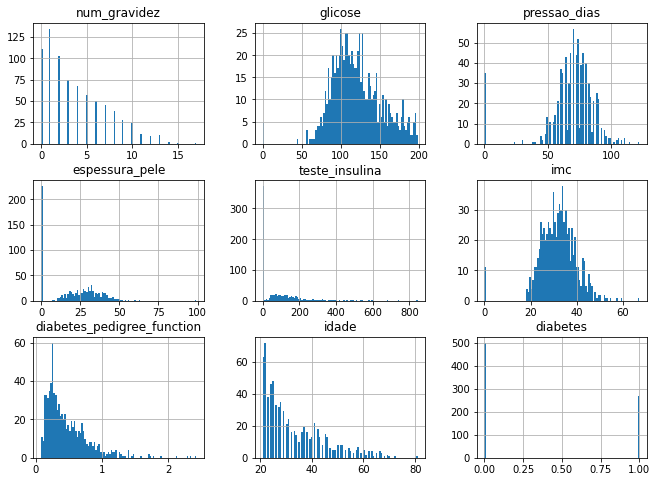

In [ ]:
df_diabetes.hist(figsize=(11,8), bins=100);

## 2.5) Gráficos de Dispersão (Scatter Plots)

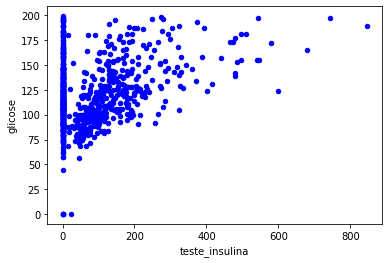

In [ ]:
df_diabetes.plot.scatter(x='teste_insulina', y='glicose', c='blue')

## 2.6) Análise de outliers


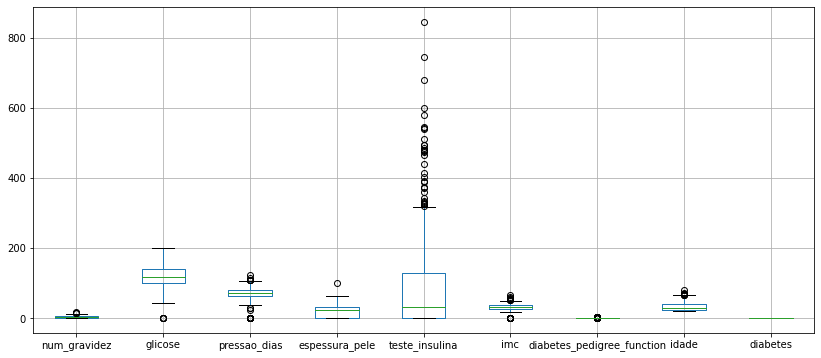

In [ ]:
df_diabetes.boxplot(figsize=(14,6))

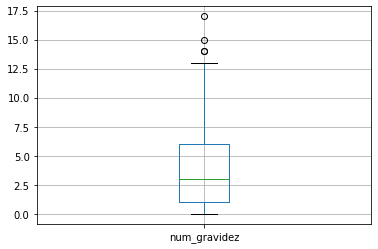

In [ ]:
df_diabetes.boxplot(column='num_gravidez')

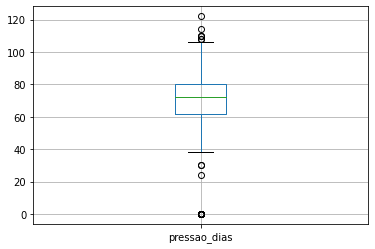

In [ ]:
df_diabetes.boxplot(column='pressao_dias')

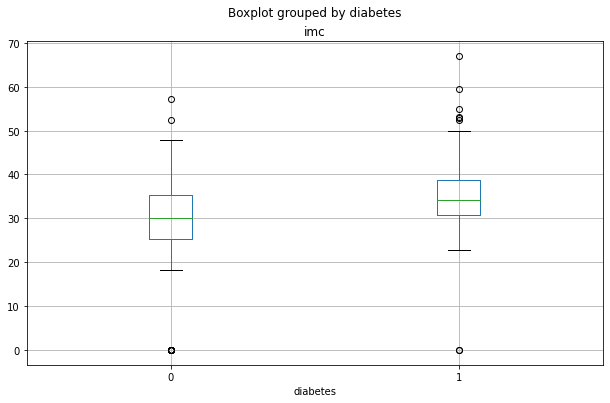

In [ ]:
df_diabetes.boxplot(column='imc', by='diabetes', figsize=(10,6));

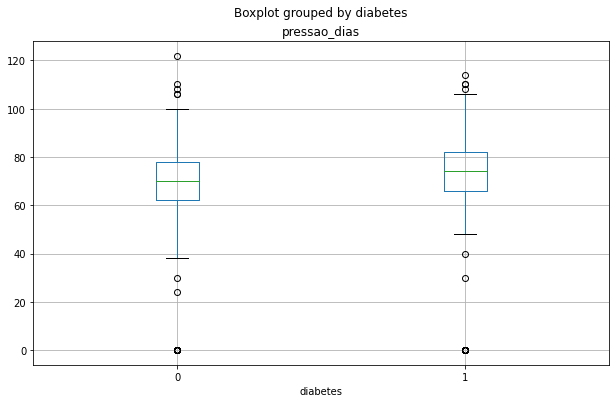

In [ ]:
df_diabetes.boxplot(column='pressao_dias', by='diabetes', figsize=(10,6));

### 2.6.1) Criar Boxplots separados por desfecho

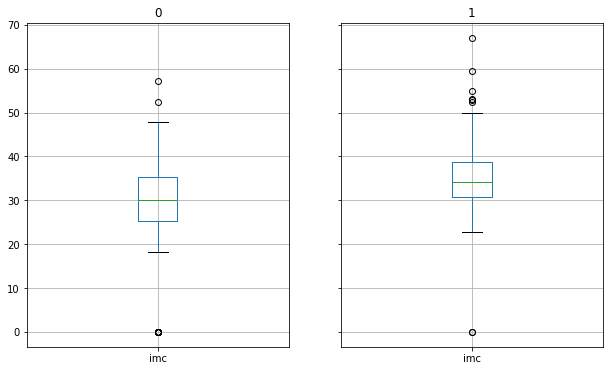

In [ ]:
df_diabetes.groupby('diabetes').boxplot(column='imc', figsize=(10,6));

In [ ]:
df_diabetes.num_gravidez.describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: num_gravidez, dtype: float64

## 2.7) Análise de Correlação - Matriz de dispersão

### 2.7.1) Análise de correlação

In [ ]:
df_cor = df_diabetes.drop(['diabetes'], axis=1).corr().abs()
df_cor

,num_gravidez,glicose,pressao_dias,espessura_pele,teste_insulina,imc,diabetes_pedigree_function,idade
num_gravidez,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341
glicose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pressao_dias,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
espessura_pele,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970
teste_insulina,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163
imc,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
diabetes_pedigree_function,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
idade,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000


In [ ]:
df_cor.style.background_gradient(cmap='Reds')

,num_gravidez,glicose,pressao_dias,espessura_pele,teste_insulina,imc,diabetes_pedigree_function,idade
num_gravidez,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341
glicose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pressao_dias,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
espessura_pele,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970
teste_insulina,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163
imc,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
diabetes_pedigree_function,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
idade,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000


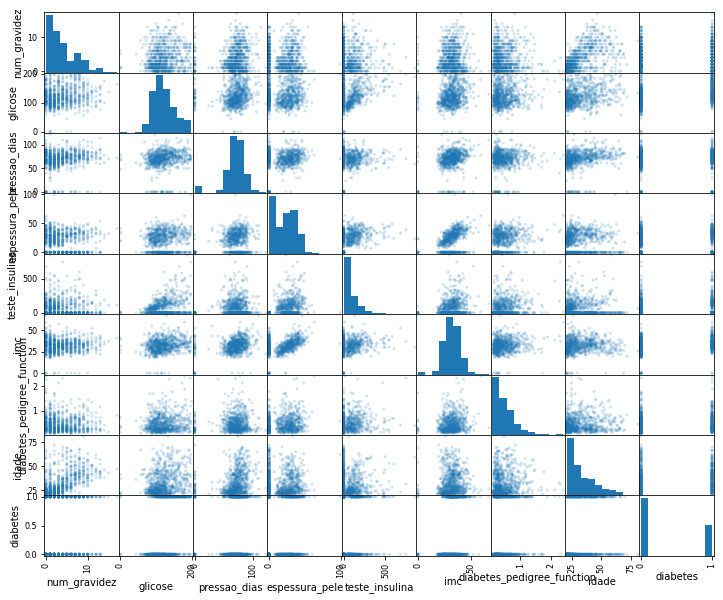

In [ ]:
pd.plotting.scatter_matrix(df_diabetes[:-1], #Não exibo a última coluna (diabetes)
                           alpha=0.2,
                           figsize=(12,10)
                           );

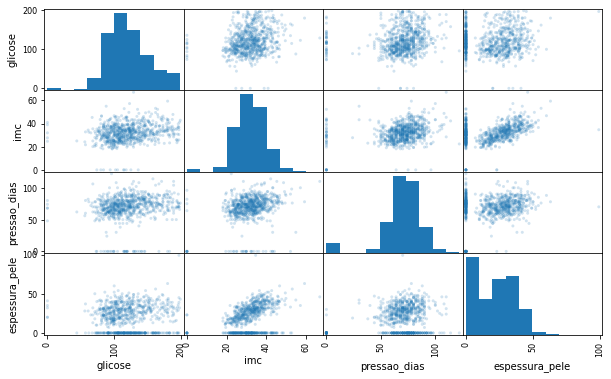

In [ ]:
pd.plotting.scatter_matrix(df_diabetes[['glicose','imc','pressao_dias','espessura_pele']], #Não exibo a última coluna (diabetes)
                           alpha=0.2,
                           figsize=(10,6)
                           );

# 3) Análise de variáveis missing

In [ ]:
df_diabetes.isnull().sum()

num_gravidez                  0
glicose                       0
pressao_dias                  0
espessura_pele                0
teste_insulina                0
imc                           0
diabetes_pedigree_function    0
idade                         0
diabetes                      0
gravidez_categorica           0
dtype: int64

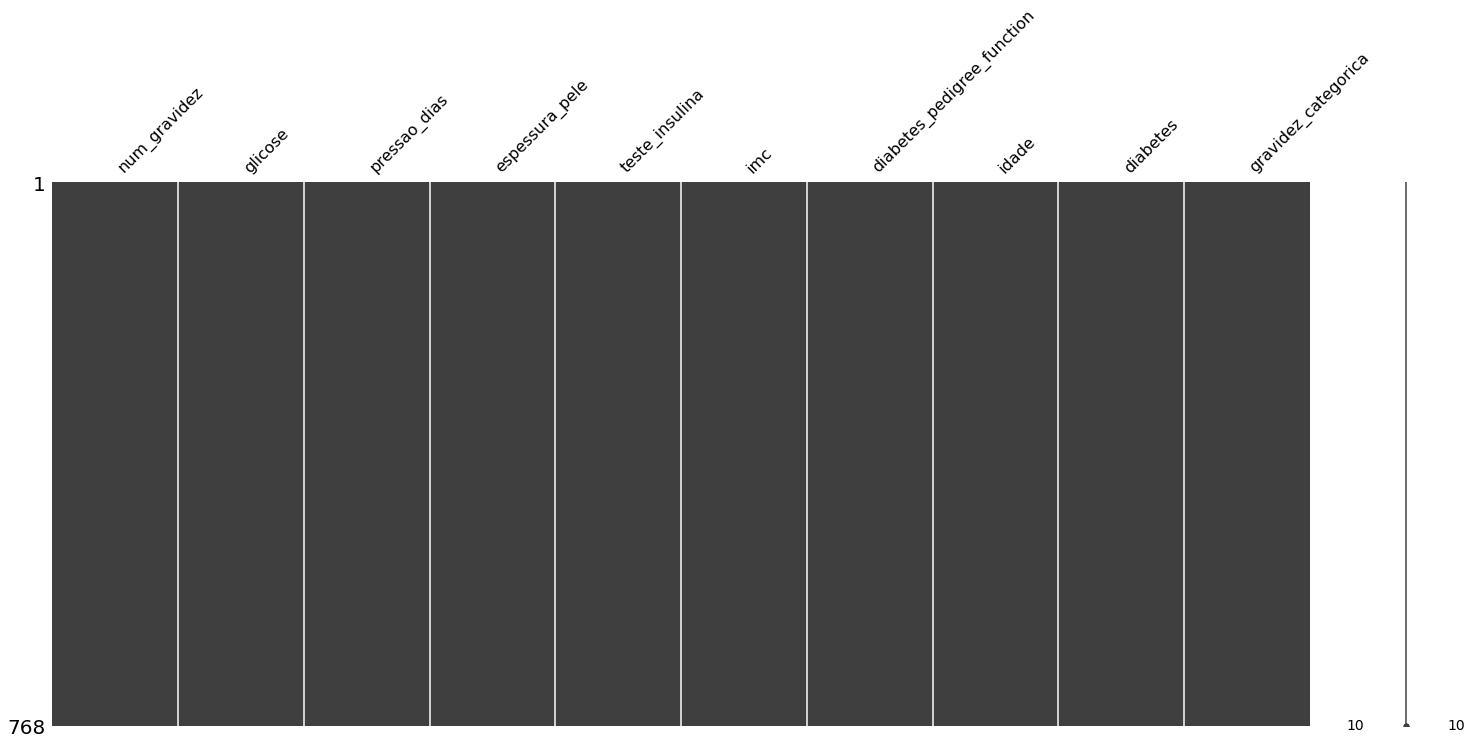

In [ ]:
msno.matrix(df_diabetes)

## 3.1) Imputação

In [ ]:
df_diabetes.head(10)

,num_gravidez,glicose,pressao_dias,espessura_pele,teste_insulina,imc,diabetes_pedigree_function,idade,diabetes,gravidez_categorica
0,6,148,72,35,0,33.6,0.627,50,1,mais de 5
1,1,85,66,29,0,26.6,0.351,31,0,0 a 2
2,8,183,64,0,0,23.3,0.672,32,1,mais de 5
3,1,89,66,23,94,28.1,0.167,21,0,0 a 2
4,0,137,40,35,168,43.1,2.288,33,1,0 a 2
5,5,116,74,0,0,25.6,0.201,30,0,3 a 5
6,3,78,50,32,88,31.0,0.248,26,1,3 a 5
7,10,115,0,0,0,35.3,0.134,29,0,mais de 5
8,2,197,70,45,543,30.5,0.158,53,1,0 a 2
9,8,125,96,0,0,0.0,0.232,54,1,mais de 5


In [ ]:
df_diabetes.loc[df_diabetes.pressao_dias.isna()]

,num_gravidez,glicose,pressao_dias,espessura_pele,teste_insulina,imc,diabetes_pedigree_function,idade,diabetes,gravidez_categorica


In [ ]:
df_diabetes_missing = df_diabetes.copy()
len(df_diabetes_missing.query('pressao_dias == 0'))

35

In [ ]:
df_diabetes_missing.loc[ df_diabetes_missing.pressao_dias == 0 ].head()

,num_gravidez,glicose,pressao_dias,espessura_pele,teste_insulina,imc,diabetes_pedigree_function,idade,diabetes,gravidez_categorica
7,10,115,0,0,0,35.3,0.134,29,0,mais de 5
15,7,100,0,0,0,30.0,0.484,32,1,mais de 5
49,7,105,0,0,0,0.0,0.305,24,0,mais de 5
60,2,84,0,0,0,0.0,0.304,21,0,0 a 2
78,0,131,0,0,0,43.2,0.270,26,1,0 a 2


3.1.1) Imputação pela média

Primeiro atribuo np.nan aos valores zerados de pressao

In [ ]:
df_diabetes_missing['pressao_dias'].loc[ df_diabetes_missing.pressao_dias == 0 ] = np.nan

Visualizo os missing values

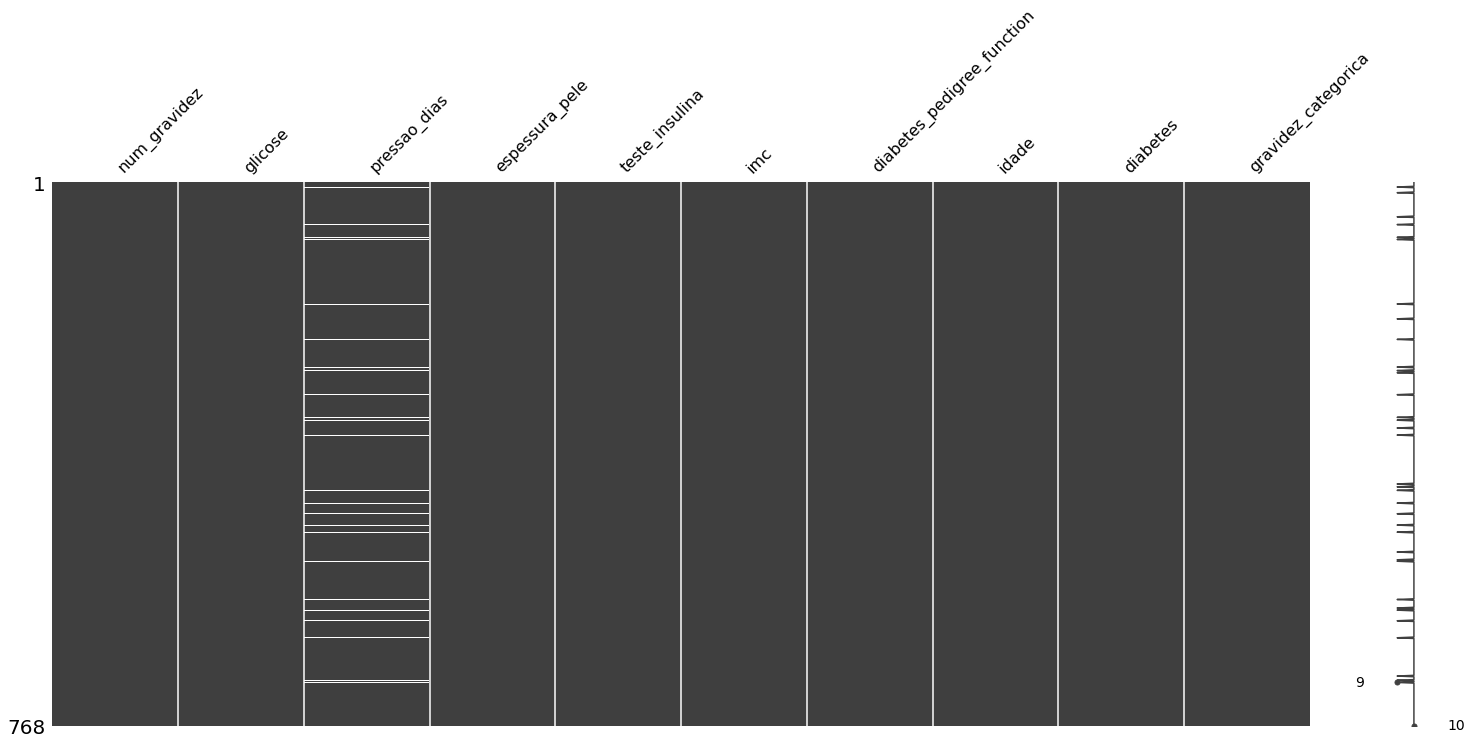

In [ ]:
msno.matrix(df_diabetes_missing)

Atribuo a média aos valores missing

In [ ]:
np.mean(df_diabetes_missing['pressao_dias'])

72.40518417462484

In [ ]:
np.nanmean(df_diabetes_missing['pressao_dias'])

72.40518417462484

In [ ]:
df_diabetes_missing['pressao_dias'].loc[ (df_diabetes_missing.pressao_dias == 0) |
                                         (df_diabetes_missing.pressao_dias.isna())] = np.nanmean(df_diabetes_missing['pressao_dias'])

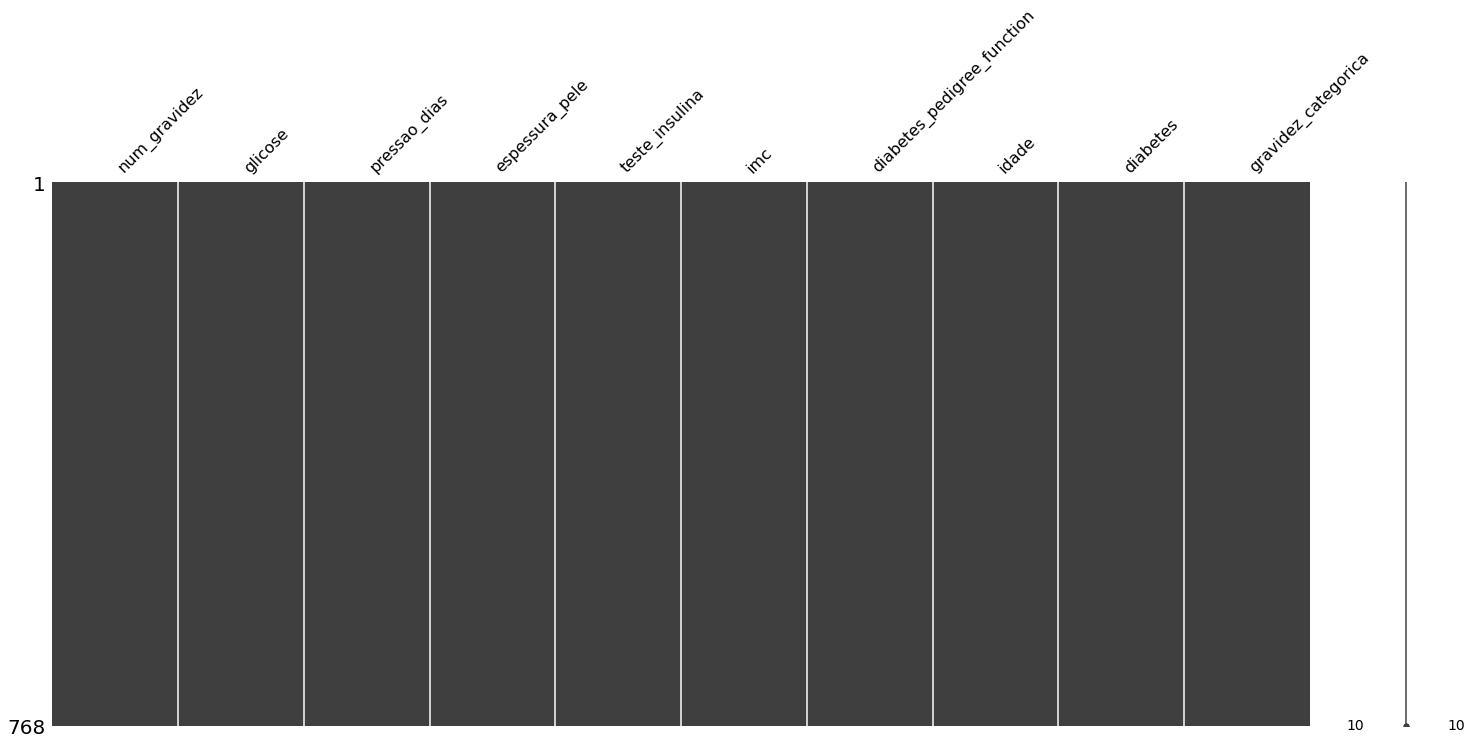

In [ ]:
msno.matrix(df_diabetes_missing)

In [ ]:
df_diabetes_missing.iloc[[7,8,9,10,15],:]

,num_gravidez,glicose,pressao_dias,espessura_pele,teste_insulina,imc,diabetes_pedigree_function,idade,diabetes,gravidez_categorica
7,10,115,72.405184,0,0,35.3,0.134,29,0,mais de 5
8,2,197,70.000000,45,543,30.5,0.158,53,1,0 a 2
9,8,125,96.000000,0,0,0.0,0.232,54,1,mais de 5
10,4,110,92.000000,0,0,37.6,0.191,30,0,3 a 5
15,7,100,72.405184,0,0,30.0,0.484,32,1,mais de 5


In [ ]:
df_diabetes_missing.loc[ df_diabetes_missing.pressao_dias == 0 ].head()

,num_gravidez,glicose,pressao_dias,espessura_pele,teste_insulina,imc,diabetes_pedigree_function,idade,diabetes,gravidez_categorica


## 3.2) Imputação pela mediana

In [ ]:
len(df_diabetes_missing.query('glicose == 0'))

5

In [ ]:
np.nanmedian(df_diabetes_missing['glicose'])

117.0

In [ ]:
df_diabetes_missing.loc[ (df_diabetes_missing.glicose == 0) |
                        (df_diabetes_missing.glicose.isna())]

,num_gravidez,glicose,pressao_dias,espessura_pele,teste_insulina,imc,diabetes_pedigree_function,idade,diabetes,gravidez_categorica
75,1,0,48.0,20,0,24.7,0.140,22,0,0 a 2
182,1,0,74.0,20,23,27.7,0.299,21,0,0 a 2
342,1,0,68.0,35,0,32.0,0.389,22,0,0 a 2
349,5,0,80.0,32,0,41.0,0.346,37,1,3 a 5
502,6,0,68.0,41,0,39.0,0.727,41,1,mais de 5


In [ ]:
df_diabetes_missing['glicose'].loc[ (df_diabetes_missing.glicose == 0) |
                                    (df_diabetes_missing.glicose.isna())]  = np.nanmedian(df_diabetes_missing['glicose'])

In [ ]:
df_diabetes_missing.iloc[[75,182]]

,num_gravidez,glicose,pressao_dias,espessura_pele,teste_insulina,imc,diabetes_pedigree_function,idade,diabetes,gravidez_categorica
75,1,117,48.0,20,0,24.7,0.140,22,0,0 a 2
182,1,117,74.0,20,23,27.7,0.299,21,0,0 a 2


In [ ]:
df_diabetes_missing['teste_insulina'].fillna(np.mean(df_diabetes['teste_insulina']), inplace=True)